In [ ]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np 
file_id = '1vnqQ3MT7ZpYp6XgpmRM8njq9dPlgecbV'
dowloaded = drive.CreateFile({'id':file_id})
dowloaded.GetContentFile('Historical_Product_Demand.csv')
df = pd.read_csv('Historical_Product_Demand.csv',header = 0,parse_dates=['Date'])

In [ ]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


## Nan

In [ ]:
df.isna().sum()
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True)
df.sort_values('Date')[1:100]
# Thay các dấu () trong order_demand
df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")
df['Order_Demand'] = df['Order_Demand'].astype('int64')

## Forecast theo Warehouse của Category_019

In [ ]:
df1 = df.groupby('Product_Category').agg({'Order_Demand':'count'}).sort_values('Order_Demand',ascending = False)

In [ ]:
df1

,Order_Demand
Product_Category,
Category_019,470266
Category_005,101627
Category_001,97787
Category_007,82402
Category_021,52008
Category_006,35552
Category_028,31012
Category_011,23208
Category_015,22954


In [ ]:
df_019 = df[df['Product_Category'] == 'Category_019']
df_019

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
63,Product_1234,Whse_J,Category_019,2012-04-25,1000
64,Product_1451,Whse_J,Category_019,2012-01-12,1000
65,Product_1274,Whse_J,Category_019,2012-01-16,1000
66,Product_1274,Whse_J,Category_019,2012-01-24,1000
67,Product_1274,Whse_J,Category_019,2012-01-24,1000
...,...,...,...,...,...
1048535,Product_1213,Whse_J,Category_019,2016-10-26,100
1048536,Product_1391,Whse_J,Category_019,2016-10-26,100
1048537,Product_1391,Whse_J,Category_019,2016-11-16,100
1048538,Product_1213,Whse_J,Category_019,2016-11-21,800


In [ ]:
df_019.groupby('Warehouse').agg('sum').sort_values('Order_Demand',ascending = False)

,Order_Demand
Warehouse,
Whse_J,2739562587
Whse_S,872342758
Whse_C,521898473
Whse_A,106355439


In [ ]:
df_019 = df_019.set_index('Date')
df_019.index

DatetimeIndex(['2012-04-25', '2012-01-12', '2012-01-16', '2012-01-24',
               '2012-01-24', '2012-01-25', '2012-02-01', '2012-02-15',
               '2012-01-31', '2012-02-07',
               ...
               '2016-08-22', '2016-08-22', '2016-09-05', '2016-09-05',
               '2016-09-20', '2016-10-26', '2016-10-26', '2016-11-16',
               '2016-11-21', '2016-11-25'],
              dtype='datetime64[ns]', name='Date', length=470266, freq=None)

#### Warehouse J

In [ ]:
df_019M = df_019[df_019['Warehouse']=='Whse_J']
df_019M

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-04-25,Product_1234,Whse_J,Category_019,1000
2012-01-12,Product_1451,Whse_J,Category_019,1000
2012-01-16,Product_1274,Whse_J,Category_019,1000
2012-01-24,Product_1274,Whse_J,Category_019,1000
2012-01-24,Product_1274,Whse_J,Category_019,1000
...,...,...,...,...
2016-10-26,Product_1213,Whse_J,Category_019,100
2016-10-26,Product_1391,Whse_J,Category_019,100
2016-11-16,Product_1391,Whse_J,Category_019,100


In [ ]:
df019_M = df_019M['Order_Demand'].resample('MS').mean()
df019_M = df019_M.to_frame()
df019_M

,Order_Demand
Date,
2011-12-01,2772.727273
2012-01-01,7338.418083
2012-02-01,7170.724768
2012-03-01,6992.891043
2012-04-01,6558.135322
...,...
2016-09-01,7982.919481
2016-10-01,7764.543970
2016-11-01,8509.703593


In [ ]:
df019_M = df019_M.rename(columns={'Date':'Date','Order_Demand':'Order_Demand'})

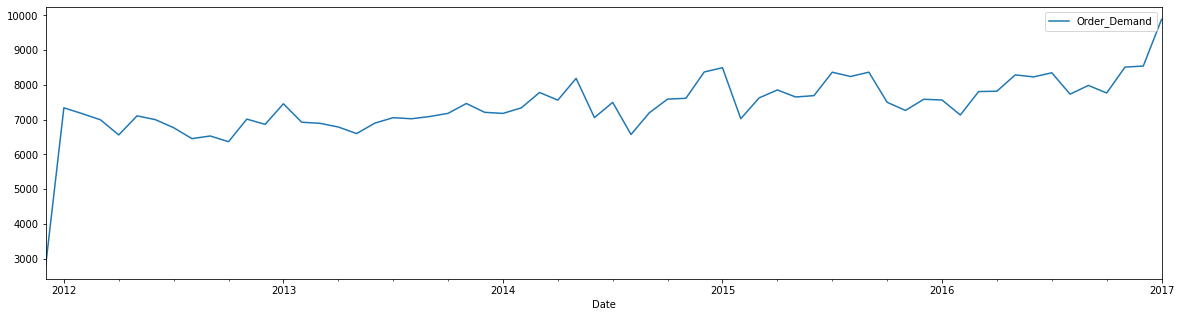

In [ ]:
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as plt
df019_M.plot(figsize = (20,5))
plt.show()

Yếu tố mùa vụ chưa rõ ràng lắm

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df019_M['Order_Demand'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.393867
p-value: 0.981264


##### Mô hình SARIMA

In [ ]:
! pip install pmdarima
from pmdarima.arima.utils import ndiffs
y = df019_M['Order_Demand'].values
kpss = ndiffs(y,alpha=0.05, test = 'kpss')
adf = ndiffs(y,alpha=0.05, test='adf')
pp = ndiffs(y,alpha=0.05, test='adf')
print(kpss,adf,pp)

1 0 0


Chọn sai phân bậc 1

In [ ]:
df019_M1 = df019_M.diff(periods=1)

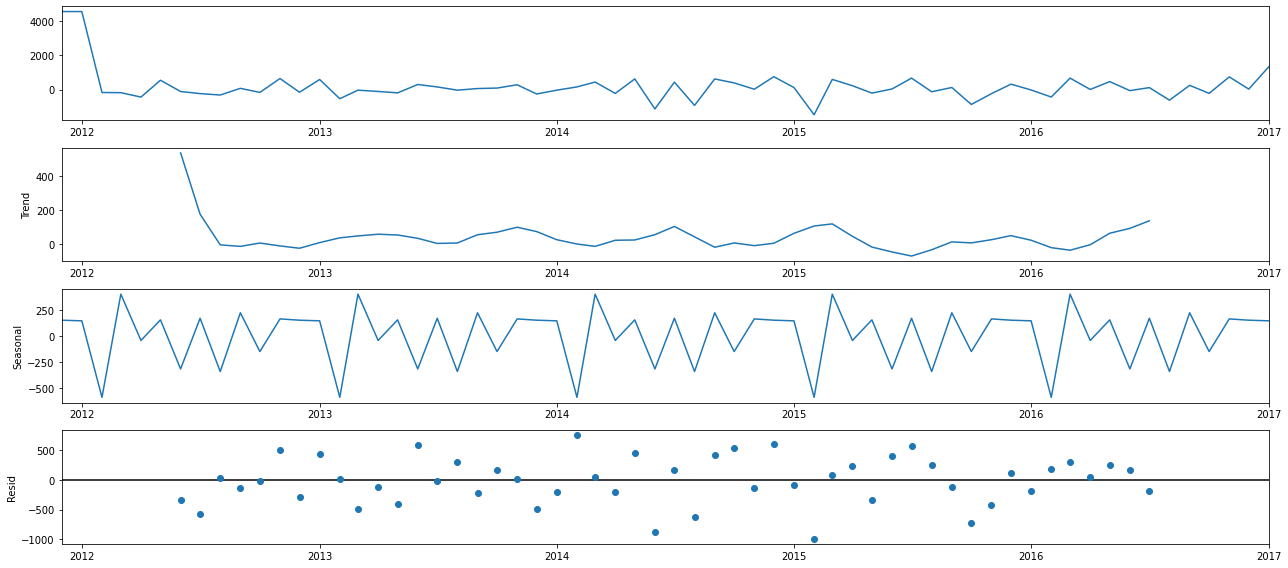

In [ ]:
df019_M1 = df019_M1.fillna(df019_M1.bfill())
from matplotlib import pylab
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(df019_M1, model = 'addictive')
fig = decomposition.plot()
plt.show()

Yếu tố mùa vụ đạt đỉnh ở đầu năm, giảm và tăng luân phiên ở các tháng còn lại

In [ ]:
## Step 1: Xác định p,d,q
import itertools
p = d = q = range(0,2)
pdq = list (itertools.product(p,d,q))
s_pdq = [(x[0], x[1], x[2],12) for x in list (itertools.product(p,d,q))]
print('SARIMAX1: {}x{}'.format(pdq[1],s_pdq[1]))
print('SARIMAX2: {}x{}'.format(pdq[1],s_pdq[2]))
print('SARIMAX3: {} x {}'.format(pdq[2], s_pdq[3]))
print('SARIMAX4: {} x {}'.format(pdq[2], s_pdq[4]))
for param in pdq:
    for param_seasonal in s_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df019_M,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX1: (0, 0, 1)x(0, 0, 1, 12)
SARIMAX2: (0, 0, 1)x(0, 1, 0, 12)
SARIMAX3: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX4: (0, 1, 0) x (1, 0, 0, 12)
SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1263.7060713684796
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:969.2549484096398
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:787.8295312674877
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:602.5731833851039
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:822.6659110744737
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:776.4542880176675
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:617.7248109783783


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:591.279025227075
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1204.0305928611965
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:899.9765158948509
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:761.9590835871251
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:577.9441448860514
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:808.8074756663316
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:752.2661506281877
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:607.0792297268152
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:568.2113537030627
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:913.8815915296872
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:738.4518027518008
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:761.3203441960719
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:565.6913049489066
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:752.6010064658549
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:740.1744023176082
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:591.715242879927
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:563.728995669968
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:894.31337685

Chọn p,d,q = (0,1,1) x (1,1,1,12)

In [ ]:
# Hồi quy mô hình
from statsmodels.tsa.statespace.sarimax import SARIMAX 
mod = sm.tsa.statespace.SARIMAX(df019_M, order = (0,1,1),
                               seasonal_order=(1,1,1,12),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       Order_Demand   No. Observations:                   62
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -266.652
Date:                            Tue, 01 Jun 2021   AIC                            541.305
Time:                                    16:46:35   BIC                            547.526
Sample:                                12-01-2011   HQIC                           543.453
                                     - 01-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5309      0.181     -2.930      0.003      -0.886      -0.176
ar.S.L12      -0.8979      0.145   

1. Phân phối của phần dư
<br> Phân phối của phần dư là phân phối chuẩn
2. Hiện tượng nhiễu trắng
<br> Không có hiện tượng nhiễu trắng hay phần dư là phần dư ngẫu nhiên thuần túy 

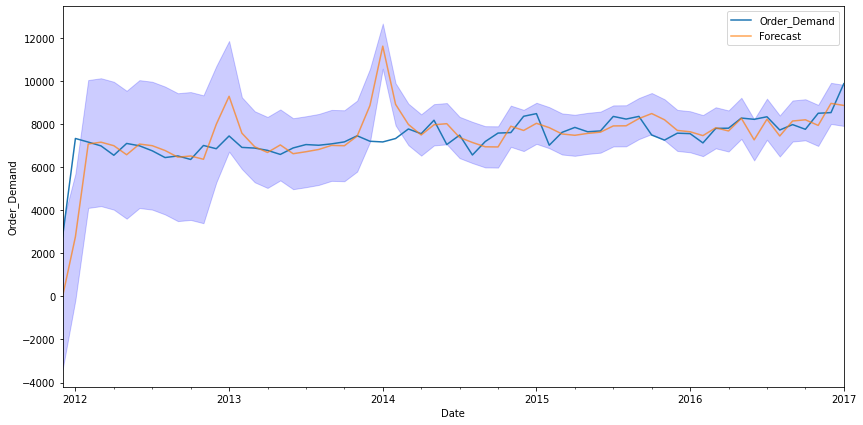

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2011-12-01'),dynamic = False)
pred_ci = pred.conf_int()
ax = df019_M['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()

Số liệu forecast với số liệu gốc khá khớp nhau

In [ ]:
# Tính RMSE
df1_forecasted = pred.predicted_mean
df1_truth = df019_M1['2016-01-01':].squeeze()
mse = ((df1_forecasted - df1_truth)**2).mean()
print('MSE {}'.format(round(mse, 2)))
print('RMSE {}'.format(round(np.sqrt(mse), 2)))

MSE 61451097.54
RMSE 7839.08


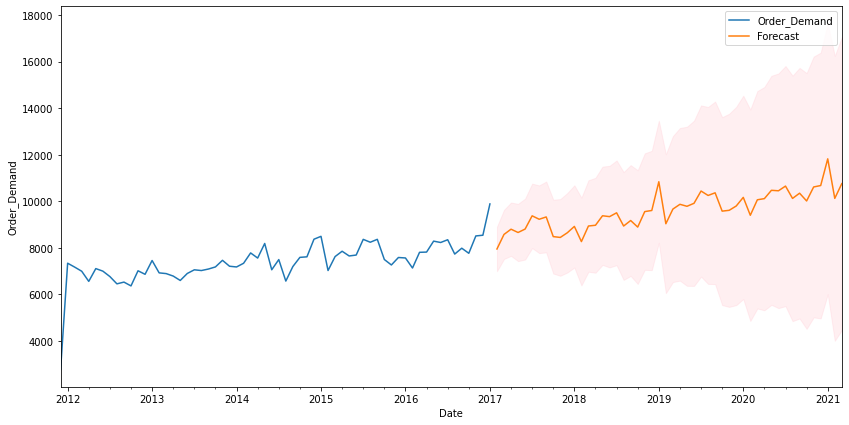

In [ ]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = df019_M.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='pink', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()

In [ ]:
pred_ci['Forecast_Demand'] = pred_uc.predicted_mean
pred_ci

,lower Order_Demand,upper Order_Demand,Forecast_Demand
2017-02-01,6995.125183,8903.291269,7949.208226
2017-03-01,7520.558485,9628.209999,8574.384242
2017-04-01,7654.160340,9943.983911,8799.072125
2017-05-01,7428.561567,9887.095495,8657.828531
2017-06-01,7496.533179,10112.921177,8804.727178
2017-07-01,7990.720226,10755.965828,9373.343027
2017-08-01,7773.185132,10679.674478,9226.429805
2017-09-01,7804.786100,10845.966364,9325.376232
2017-10-01,6895.890360,10066.044058,8480.967209
2017-11-01,6798.308822,10092.390102,8445.349462


##### Mô hình MA

In [ ]:
df019_M = df019_M.fillna(df019_M.bfill())

In [ ]:
df019_M.index = pd.Index(sm.tsa.datetools.dates_from_range('2011m12', '2017m1'))
df019_M

,Order_Demand
2011-12-31,2772.727273
2012-01-31,7338.418083
2012-02-29,7170.724768
2012-03-31,6992.891043
2012-04-30,6558.135322
...,...
2016-09-30,7982.919481
2016-10-31,7764.543970
2016-11-30,8509.703593
2016-12-31,8540.217415


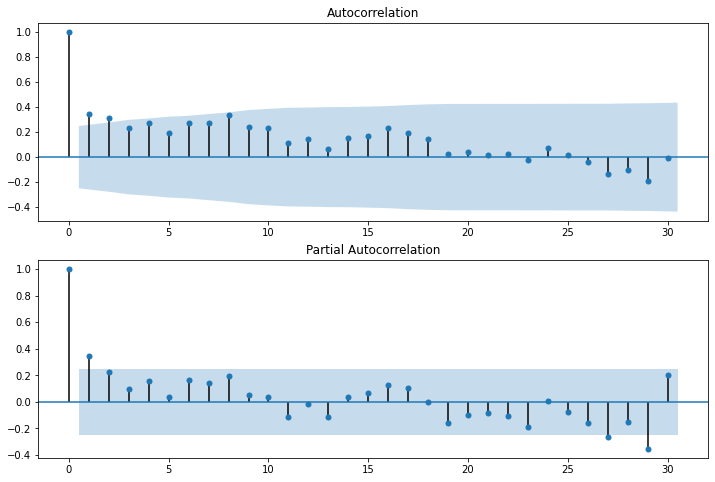

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df019_M['Order_Demand'].values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df019_M['Order_Demand'], lags=30, ax=ax2)

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df019_M['Order_Demand'].values, order=(0,4,1))
result1 = model.fit()
print(result1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   62
Model:                 ARIMA(0, 4, 1)   Log Likelihood                -504.249
Date:                Tue, 01 Jun 2021   AIC                           1012.499
Time:                        16:46:37   BIC                           1016.619
Sample:                             0   HQIC                          1014.104
                                 - 62                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.190     -5.253      0.000      -1.373      -0.627
sigma2      1.997e+06   9.53e-08    2.1e+13      0.000       2e+06       2e+06
Ljung-Box (L1) (Q):                  36.98   Jarque-

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


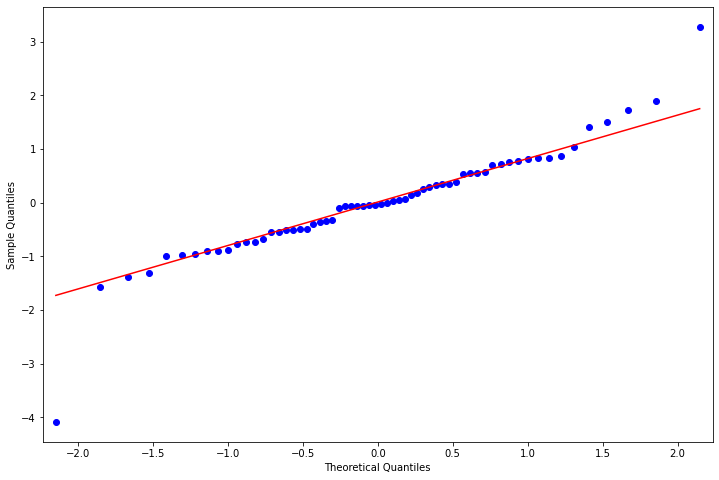

In [ ]:
## Kiểm định
from statsmodels.graphics.api import qqplot
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

resid = result1.resid
stats.normaltest(resid)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [ ]:
from matplotlib import pyplot as plt

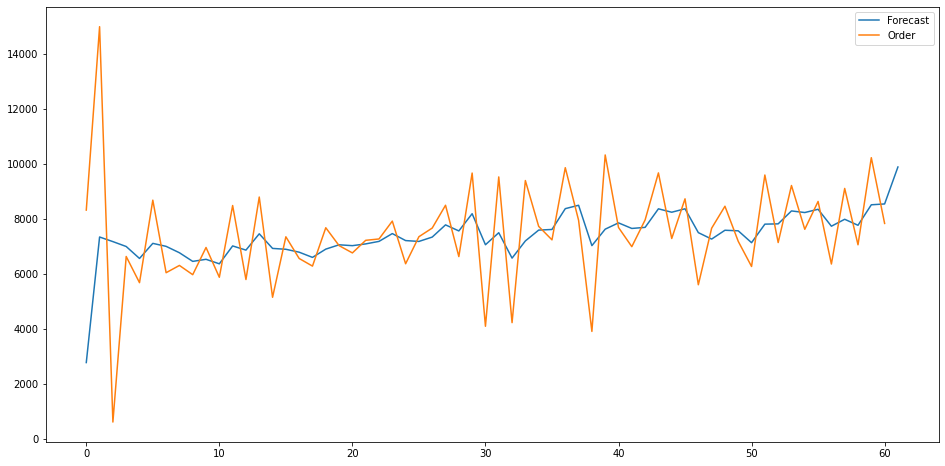

In [ ]:
plt.figure(figsize=(16,8))
pred1 = result1.get_prediction(start=1,dynamic = False)
ax = df019_M['Order_Demand'].values
plt.plot(ax, label='Forecast')
plt.plot(pred1.predicted_mean, label='Order')
plt.legend(loc='best')
plt.show()

In [ ]:
# Tính RMSE
df1_forecasted = pred1.predicted_mean
df1_truth = df019_M['Order_Demand']['2012-01-31':]
mse = ((df1_forecasted - df1_truth)**2).mean()
print('MSE {}'.format(round(mse, 2)))
print('RMSE {}'.format(round(np.sqrt(mse), 2)))

MSE 3648457.83
RMSE 1910.09


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(df1_forecasted, df1_truth))
print(rms)

1910.0936707095689


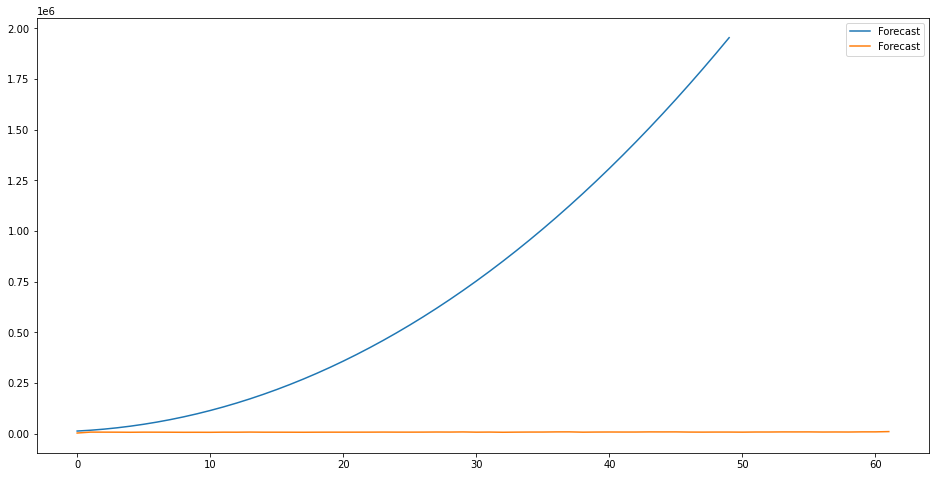

In [ ]:
plt.figure(figsize=(16,8))
pred1 = result1.get_forecast(steps=50 ,dynamic = False)
ax = df019_M['Order_Demand'].values
plt.plot(pred1.predicted_mean, label='Forecast')
plt.plot(ax, label='Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
pred1.predicted_mean

array([  12550.83270454,   16549.23372634,   21888.56336865,
         28577.97140843,   36626.60762261,   46043.62178813,
         56838.16368195,   69019.383081  ,   82596.42976222,
         97578.45350257,  113974.60407899,  131794.0312684 ,
        151045.88484777,  171739.31459404,  193883.47028414,
        217487.50169503,  242560.55860363,  269111.79078691,
        297150.3480218 ,  326685.38008524,  357726.03675418,
        390281.46780556,  424360.82301632,  459973.25216342,
        497127.90502378,  535833.93137436,  576100.4809921 ,
        617936.70365394,  661351.74913683,  706354.76721771,
        752954.90767351,  801161.32028119,  850983.15481769,
        902429.56105996,  955509.68878493, 1010232.68776954,
       1066607.70779075, 1124643.8986255 , 1184350.41005073,
       1245736.39184337, 1308810.99378039, 1373583.36563871,
       1440062.65719528, 1508258.01822706, 1578178.59851097,
       1649833.54782396, 1723232.01594298, 1798383.15264497,
       1875296.10770688,